## Spotify: Predict the top genre a song belongs to using Machine Learning Classification models.

The aim of this project is to use data from Spotify and capture various attributes of a song. The classification problem aims to predict the "top genre" that a song belongs to.We will use Python to carry out Machice Learning tasks.

The dataset is readily available from https://www.kaggle.com/datasets/cnic92/spotify-past-decades-songs-50s10s.
There are seven seperate files that are downloaded.

Using pandas we would first read the seven different files, then combine them making sure we index them correctly. The dimensions of the data is also shown (the reason for this is to see if the  sum of individuals are the same as the one final one shown). The dimension is 667 by 15.


In [ ]:
#import packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#call all the data files and put them into one whilst indexing them
data = pd.concat(
    map(pd.read_csv, ['1950.csv','1960.csv','1970.csv','1980.csv'
    ,'1990.csv','2000.csv','2010.csv']),
    ignore_index=True)

#check the dimensions
data.shape

(667, 15)

We can also take a look at the last row to see the index is also coherent to the dimensions shown above. (We also checked the first and last five rows)

In [ ]:
#check the indexing
#print(len(data.index))
#look at the last row
print(data.tail(1))

     Number           title         artist top genre  year  bpm  nrgy  dnce  \
666     100  All I Wanna Do  Martin Jensen  big room  2016  112    79    73   

     dB  live  val  dur  acous  spch  pop  
666  -4     7   56  194     16     7   32  


# 1. Pre-processing

Preprocessing is one of the most important step in cleaning the data before using any machine learning classification algortithms. This can be done by removing rows that have NULL/NA values. We also check each variables using a histogram.

First we look for any values that are NA or NULL, "top genre" has 16 NA values, therefore we should remove those rows.  

In [ ]:
#we want to display the coloumns with NA or NULL
is_nan = data.isna().sum()
is_nan

Number        0
title         0
artist        0
top genre    16
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

We will remove the rows from the data and check again the shape of the data. The dimensions of the data is now 651 by 15

In [ ]:
#drop the rows with NA
data = data.dropna()
data.shape

(651, 15)

We can aslo use see the information of the data such as the column names, the null count and the data types. The data types are integers and three objects.

In [ ]:
#check if there are any null/na and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 0 to 666
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     651 non-null    int64 
 1   title      651 non-null    object
 2   artist     651 non-null    object
 3   top genre  651 non-null    object
 4   year       651 non-null    int64 
 5   bpm        651 non-null    int64 
 6   nrgy       651 non-null    int64 
 7   dnce       651 non-null    int64 
 8   dB         651 non-null    int64 
 9   live       651 non-null    int64 
 10  val        651 non-null    int64 
 11  dur        651 non-null    int64 
 12  acous      651 non-null    int64 
 13  spch       651 non-null    int64 
 14  pop        651 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 81.4+ KB


Looking at the summary statistics of the data, we see that there maybe some columns that need transformations.

In [ ]:
#summary statistics of the all columns
data.describe()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,48.485407,1994.685100,119.159754,61.741935,60.499232,-8.302611,18.113671,57.413210,224.976959,29.331797,6.202765,63.947773
std,28.642535,17.823772,24.938305,21.601234,14.987418,3.658790,14.386296,24.357777,58.975466,28.637424,6.220714,13.165936
min,1.000000,1945.000000,62.000000,6.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,24.000000,1979.000000,102.000000,45.000000,51.000000,-10.500000,9.000000,39.000000,187.500000,5.500000,3.000000,56.000000
50%,48.000000,1998.000000,120.000000,65.000000,62.000000,-8.000000,13.000000,58.000000,219.000000,19.000000,4.000000,66.000000
75%,72.000000,2010.000000,134.000000,79.000000,71.000000,-6.000000,23.500000,78.000000,255.000000,51.000000,6.000000,74.000000
max,105.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,94.000000


We can also look at the histograms of the the individual numerial features.

The features such as "live", "acous" and "spch" are skewed with long tails. This would make it harder for the machine learning algorithm to detect the patterns needed. The aim here is to make the shape a more bell-shaped curve. We also see that all the scales are different such as "dB" and "bpm".

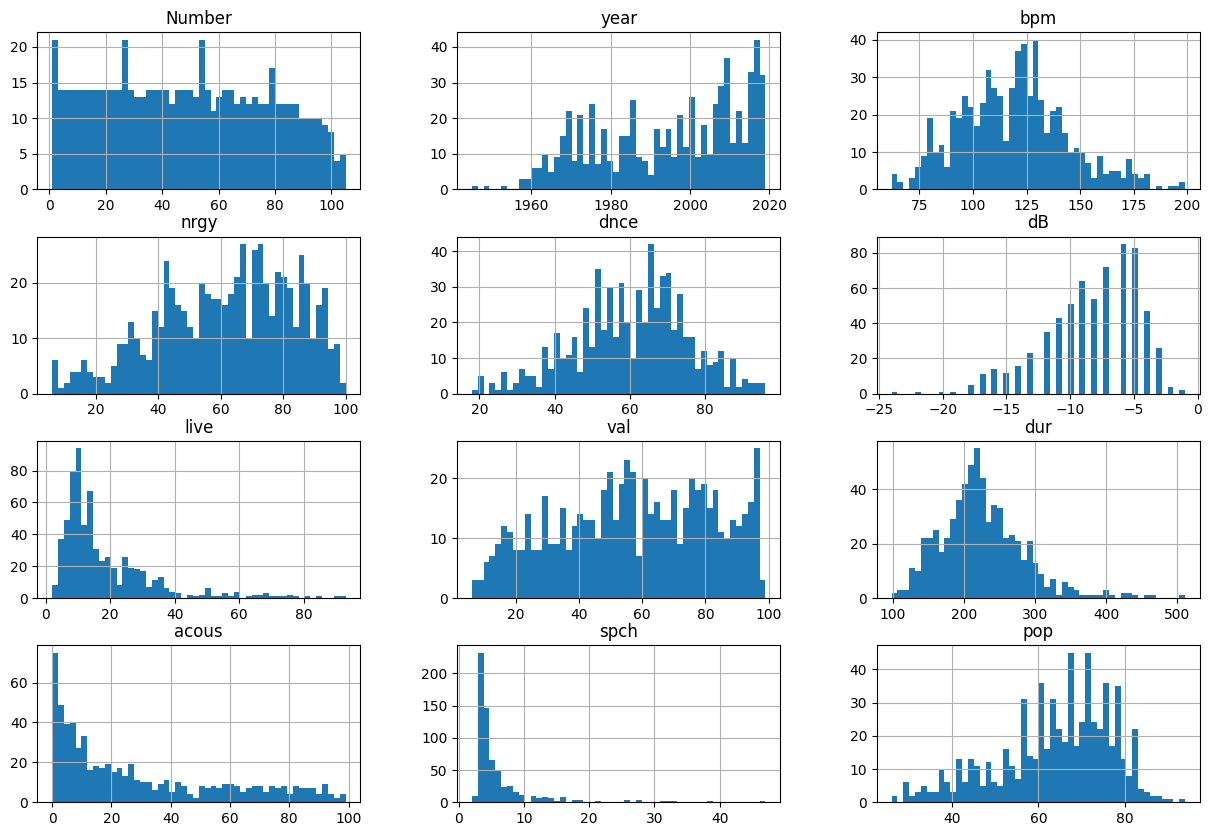

In [ ]:
#check the distributions using a histograms
data.hist(bins=50, figsize=(15,10))
plt.show()

Lets first transform "live", "acous" and "spch". This is done by using a log transformation.

Note that the "acous" variable has many zeros, therefore we add one to it before applying the log transformation.

The "log_live" shows the bell shaped curve we are looking for. However, the "log_spch" and the "log_acous" do not show the shape needed.

We also looked at other transformations such as the square-root, cube-root and the quadratic and cubic powers with them not yielding better results.

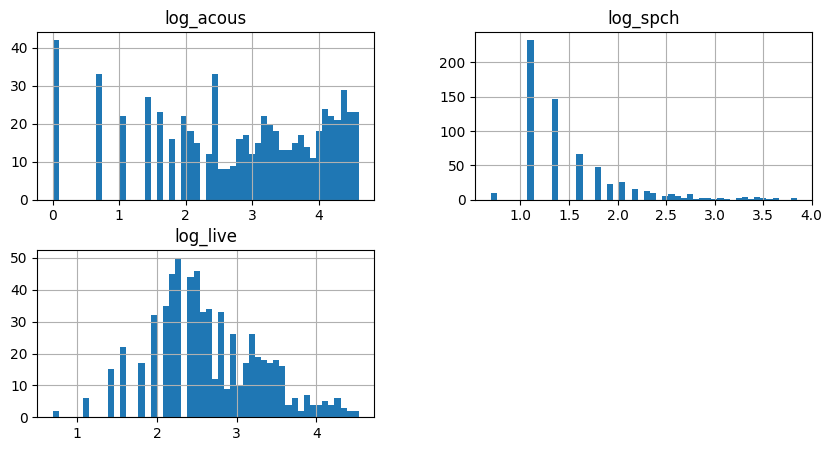

In [ ]:
#transformation using log
#acous has a +1 because of the zeros
data["log_acous"] = np.log(data[["acous"]]+1)
data["log_spch"] = np.log(data[["spch"]])
data["log_live"] = np.log(data["live"])
#take a look at the changes
data[["log_acous","log_spch","log_live"]].hist(bins=50, figsize=(10,5))
plt.show()

Therefore, the variables that are not needed such as "Number", "title", "year", "live", "spch" and "acous" have been dropped. These variables are either being replaced with their transformations or they provide no insight.

The name the new dataset is "data_tr" to indicate the transformation that has occured and also a simple reference point back.

In [ ]:
#data that has been transfromed and drop features
data_tr = data.drop(["Number", "title", "artist","live",
                     "acous","year","spch"],
                    axis=1)
#check the shape
data_tr.shape

(651, 11)

We should also standardise the scales, this is because the algorithms do not perform well with different scales where the "bpm" is between 6 to 199, whereas "dB" is between -24 to -1.
Using the StandardScaler from the sklearn.preprocessing package, we standardised the scales for all variables.

Note we also need to seperate the numerical and categorical data and then scale the numerical data.

In [ ]:
#import the StandardScaler
from sklearn.preprocessing import StandardScaler

#call the function
scaler = StandardScaler()

#seperate the numerical and the categorical variables
data_cat = data_tr["top genre"]
data_num = data_tr.drop(["top genre"], axis=1)

#take account of the numerical coloumns
data_num_col = data_num.columns

#scale and standardise the data
data_num = scaler.fit_transform(data_num)

#put it back into a dataframe
data_num = pd.DataFrame(data_num, columns=data_num_col)

A final look at the histograms, we see that most have a bell shaped curve and have a mean around 0. The "spch" is still skewed, however it is in the range of the other variables such as "dur".

Checking if there is any correlations between the variables using heatmap provided by the seaborn package and the correlation funtion. The two variables, "nrgy" and "dB" are highly postively correlated (0.70). We also see that the "log_acous" with the both the "dB" and "nrgy" are negatively corelated ("log_acous" and "dB" is -0.44, "log_acous" and "nrgy" -0.56). There is also little or no correlation between "val" and "log_acous" (0.0031), this shows that they have no linear relationship, but can have a non-linear relationship.

                bpm      nrgy      dnce        dB       val       dur  \
bpm        1.000000  0.170619 -0.061565  0.038232  0.078724  0.038544   
nrgy       0.170619  1.000000  0.328585  0.704662  0.397615  0.117019   
dnce      -0.061565  0.328585  1.000000  0.295100  0.448928  0.048595   
dB         0.038232  0.704662  0.295100  1.000000  0.126906  0.027845   
val        0.078724  0.397615  0.448928  0.126906  1.000000 -0.120473   
dur        0.038544  0.117019  0.048595  0.027845 -0.120473  1.000000   
pop        0.059908  0.247193  0.244947  0.363117 -0.118335  0.244683   
log_acous -0.148545 -0.560332 -0.274753 -0.442756 -0.108418 -0.129993   
log_spch   0.066756  0.266433  0.262769  0.254433  0.097026  0.026746   
log_live  -0.009510  0.072293 -0.135528  0.055983  0.003103 -0.064410   

                pop  log_acous  log_spch  log_live  
bpm        0.059908  -0.148545  0.066756 -0.009510  
nrgy       0.247193  -0.560332  0.266433  0.072293  
dnce       0.244947  -0.274753  0.262

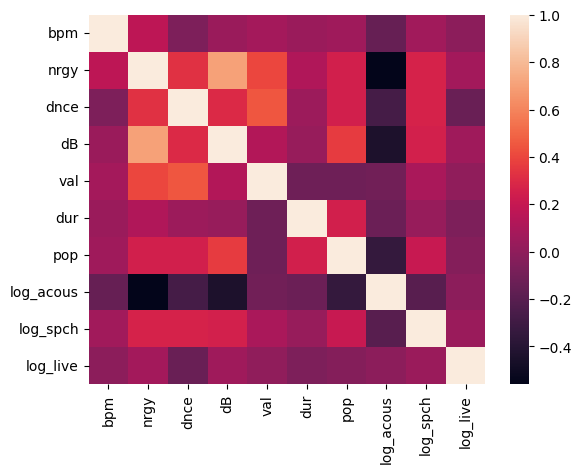

In [ ]:
#use correlations of the numeric feature
corr = data_num.corr()
#print correlations
print(corr)

#import seaborn package
import seaborn as sns

#plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Now that we have preprocessed the numerical variables, let us look into the categorical variables. We see that "dance pop" has the most frequent counts (114) and many have a count of 1 such as afrobeat, afropop and british blues.

Also notice that there are 115 unique categories with many having a count less than 77.

We ran the process using a logisitc regression of both the binary and the multiclass, we found that the performance of the classification was very low (accuracy of 0.2).
Therefore we reduced the "top genre" target group to only 3, "dance pop", "adult standards" and "other".

Leading to the "others" genre having 444 counts, which means the "dance pop" has 114 and the "adult standard" has 93. We also notice that the groups are unbalanced.

We seperate the transformed data into two. This will allow us to split it the data.

In [ ]:
#recall the transformed data
data_tr

#check the counts
data_tr["top genre"].value_counts()

top genre
dance pop                 114
adult standards            93
album rock                 77
glam rock                  23
brill building pop         20
                         ... 
australian talent show      1
afrobeat                    1
british blues               1
afropop                     1
aussietronica               1
Name: count, Length: 115, dtype: int64

In [ ]:
#create a group "other" if we have less than 80 counts and rename the
#the groups which are not above 80 into other
for genre in data_tr['top genre'].unique():
    if data_tr[data_tr['top genre'] == genre].shape[0] <= 80:
        data_tr['top genre'] = data_tr['top genre'].replace(genre, 'other')

#show the genres and their counts
data_tr['top genre'].value_counts()


top genre
other              444
dance pop          114
adult standards     93
Name: count, dtype: int64

# 2. Train-Test Split



We will begin by first having a data group and a target group. The target group is the "top genre" and the data group is the numerical data.

We will split the data into a training group and a testing group, with 70%-30% split ratio and a random state where the answers can be replicated.

In [ ]:
#import the train test split model selection
from sklearn.model_selection import train_test_split

#seperate the features and target groups
X = data_tr.drop(["top genre"], axis=1)
y = data_tr["top genre"]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=24)

#check the dimension
X_train.shape, X_test.shape

((455, 10), (196, 10))

# 3. Logistic Regression

Logisitic Regression is a model that is used to estimate that particular instance belong to a specific class. This make is classification model. If a probability of an instance is greater than 0.5 then it is put in to the class "1" or it will classified in class "0". This makes it a binary classifier [1].

We will use the basic logistic regression and compare it with a multiclass approach.

The multiclass model is a One-Vs-Rest (OVR) approach, which starts with "k" classifiers and have a one class detector. This continues until we have "k" classifiers with "k" detecters [1].

We will fit the models using the "X_train" and "y_train", then check the performance of the training set which should decide if the model is a good fit.  
We will then predict the model with the "X_test" and finally evaluate the model using the predicted values with the "y_test". This will be done for all the machine learning models.

The performance is measured by the confusion matrix which is the preferred measurement for classification problems [1]. The accuracy which is the ratio of correct prediction.
The precision which is the accuracy of positive prediction, the recall which is also known as the sensitity or the ratio of postive instances correctly detected by the classifier and finally the F1 score which combines the precision and the recall thus giving us a metric to compare two classifiers [1].

The precision and the recall are derived from the confusion matrix. There is inverse relationship between the recall and the recall meaning that increasing the recall would decrease the precision and vice versa.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of training set with 5: 1.0
Accuracy of training set: 0.6857142857142857
Testing set Performance
Confusion Matrix:  
 [[  5   0  20]
 [  0   4  31]
 [  3   9 124]]
Accuracy:  0.6785714285714286
Precision:  0.6263262502803318
Recall:  0.6785714285714286
F1:  0.6217308759224238


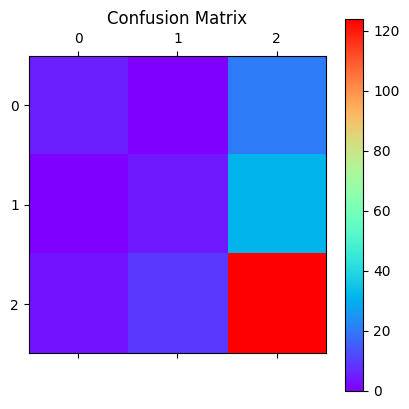

In [ ]:
#import the logisitic regression and the performance metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


#Fit the logistic regression
log_reg = LogisticRegression(random_state=24)
log_reg.fit(X_train, y_train)

#Evaluation with the Training set with 5 rows
print("Accuracy of training set with 5:",
      accuracy_score(y_train[:5],log_reg.predict(X_train[:5])))

#Evaluation with the Training set
print("Accuracy of training set:",
      accuracy_score(y_train,log_reg.predict(X_train)))

#predict using the x test
pred = log_reg.predict(X_test)

#Evaluation with the testing set
print("Testing set Performance" )
print("Confusion Matrix: ", "\n",
      confusion_matrix(y_test, pred))
print("Accuracy: ", accuracy_score(y_test, pred))
print("Precision: ", precision_score(y_test, pred, average="weighted"))
print("Recall: ", recall_score(y_test, pred, average="weighted"))
print("F1: ", f1_score(y_test, pred, average="weighted"))

#Confusion Matrix plot
conf_mat = confusion_matrix(y_test, pred)
plt.matshow(conf_mat, cmap= plt.cm.rainbow)
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


A quick look at the performance of the training set with 5 rows has a accuracy of 1.0 meaning it perfectly predicited the genre. However, when we increase the training set the accuracy decreases to 0.70. This shows that the basic logisitc regression might not be the best model. We will explore other models.

The accuarcy of the testing set of the logisitic regression is 0.69, the precision is 0.63, the recall is 0.69 and the f1 score is 0.62. This has tripled the improvement of the model classification in all the performance metrics compare to the 115 genres.

The confusion matrix plot shows that group two which is "other" is prediciting well. We also note that the confusion matrix has very contrasting colours or numbers, this is explained by the "other" genre group having 136 while "dance pop" and "adult standards" having 35 and 25 respectively.

#4. One Vs Rest Classifier


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of training set with 5: 1.0
Accuracy of training set: 0.6879120879120879
Confusion Matrix:  
 [[  6   0  19]
 [  0   3  32]
 [  3   3 130]]
Accuracy:  0.7091836734693877
Precision:  0.6726848197842674
Recall:  0.7091836734693877
F1:  0.6402613365112145


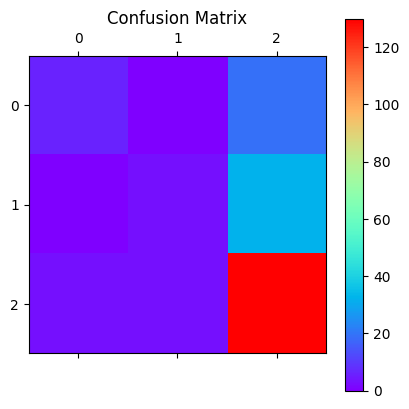

In [ ]:
#import the muticlass OVR classifier
from sklearn.multiclass import OneVsRestClassifier

#Use the logistic regression
log_reg = LogisticRegression(random_state=24)

#Use the OVR classifer on the logistic regression
ovr = OneVsRestClassifier(log_reg)

#fit the OVR classifer
ovr.fit(X_train, y_train)

#Evaluation with the Training set with 5 rows
print("Accuracy of training set with 5:",
      accuracy_score(y_train[:5],ovr.predict(X_train[:5])))

#Evaluation with the Training set
print("Accuracy of training set:",
      accuracy_score(y_train,ovr.predict(X_train)))


#predict the OVR with the X_test
pred = ovr.predict(X_test)


#Evaluation with the y_test
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, pred))
print("Accuracy: ", accuracy_score(y_test, pred))
print("Precision: ", precision_score(y_test, pred, average="weighted"))
print("Recall: ", recall_score(y_test, pred, average="weighted"))
print("F1: ", f1_score(y_test, pred, average="weighted"))

#Confusion Matrix plot
conf_mat = confusion_matrix(y_test, pred)
plt.matshow(conf_mat, cmap= plt.cm.rainbow)
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

The performance of the training set with 5 rows has a accuracy of 1.0 meaning it also perfectly predicted the genre. However, when we increase the training set the accuracy decreases to 0.70 which is the same performance as the simple logostic regression.

The accuracy of the testing set of the OVR logistic regression is 0.71, the precision is 0.67, the recall is 0.71 and the f1 score is 0.64.

Also the a slight improvement to the simple logistic regression with three classes.

# 5. Decision Tree

Decision Trees are one of the most robost algorithms, which have the capabilties of fitting complex datasets [1]. In our case this would be a good model to fit and predict. This is done with the evaluation of performance of the training set.

One feature of the decision tree is that it make few assumptions and is quite adaptive to the training set [1]. This could cause it to overfit [1]. The overfitting is controlled by the max_depth parameter [1].

Accuracy of training set with 5: 0.6
Accuracy of training set: 0.6835164835164835
Confusion Matrix:  
 [[ 14   0  11]
 [  2   0  33]
 [ 16   0 120]]
Accuracy:  0.6836734693877551
Precision:  0.5635188526630165
Recall:  0.6836734693877551
F1:  0.6177586824203366


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


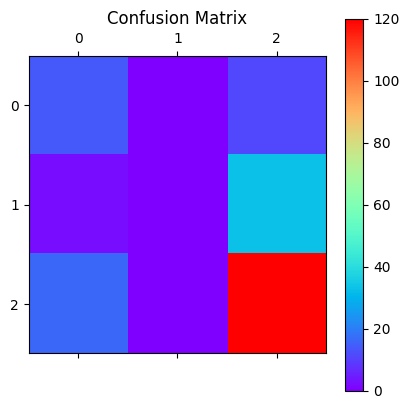

In [ ]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#fit the tree classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=24)
tree_clf.fit(X_train, y_train)

#Evaluation with the Training set with 5 rows
print("Accuracy of training set with 5:",
      accuracy_score(y_train[:5],tree_clf.predict(X_train[:5])))

#Evaluation with the Training set
print("Accuracy of training set:",
      accuracy_score(y_train,tree_clf.predict(X_train)))

#predict using the X_test
pred = tree_clf.predict(X_test)

#Evaluation with the y_test
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, pred))
print("Accuracy: ", accuracy_score(y_test, pred))
print("Precision: ", precision_score(y_test, pred, average="weighted"))
print("Recall: ", recall_score(y_test, pred, average="weighted"))
print("F1: ", f1_score(y_test, pred, average="weighted"))

#Confusion Matrix plot
conf_mat = confusion_matrix(y_test, pred)
plt.matshow(conf_mat, cmap= plt.cm.rainbow)
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


The performance of the training set with 5 rows has a accuracy of 0.6. When we increase the training set the accuracy increases to 0.68. This shows that the tree is not a suitable model for this problem.

But we will look into the accuracy of testing set of the decision tree is 0.68, the precision is 0.56, the recall is 0.68 and the f1 score is 0.62 at a "max_depth" of two.

Increasing the "max_depth" from two to four has not yeilded an big increase of performance. The only thing that the max_depth has done is dispay the "other" class in the tree plot.

The confusion matrix plot has made no correct decision on the "dance pop" category. The tree diagram shows no "other" genre with a depth of two.


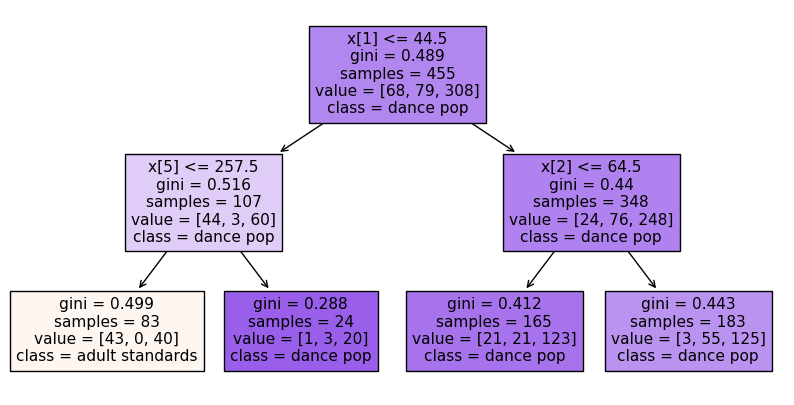

['adult standards' 'other' 'dance pop']


In [ ]:
#import tree
from sklearn import tree

#plot the decision treee
plt.figure(figsize=(10,5))
tree.plot_tree(tree_clf,class_names=y.unique(),filled=True)
plt.show()

#making sure we have three unique classes
print(y.unique())

# 6. Random Forests

Random forest is an ensamble of the bagging method in the decision tree [1]. This is a more convient way to optimise the decision tree [1]. Also note that the parameters are "n_estimators" which is set to  100, we have a "max_leaf_nodes" of 16 and "n_jobs" of -1.

The random forest has extra randomness when we are growing the tree compared to the decision tree [1].
This also trades a higher bias for a lower variance [1].

We will also use a feature importance to measure the importance of each features.


Accuracy of training set with 5: 1.0
Accuracy of training set: 0.7582417582417582
Confusion Matrix:  
 [[ 10   0  15]
 [  0   0  35]
 [  4   1 131]]
Accuracy:  0.7193877551020408
Precision:  0.5933065412431745
Recall:  0.7193877551020408
F1:  0.6388994811707746


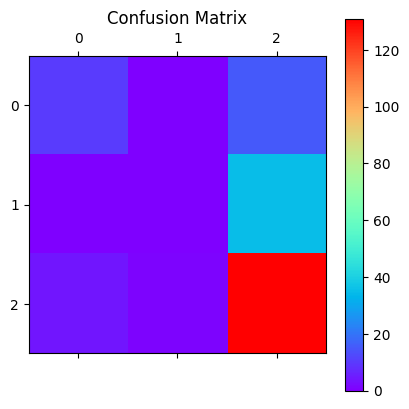

bpm 0.06875448116847557
nrgy 0.16737788112684218
dnce 0.12562534933732125
dB 0.08665632675129295
val 0.06254458301745537
dur 0.1484015389234757
pop 0.11526592519031657
log_acous 0.11934505985030444
log_spch 0.053665377161681134
log_live 0.05236347747283485


In [ ]:
#import the random forest classifier
from sklearn.ensemble import RandomForestClassifier

#call the random forest with its parameters
forest_clf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=16 ,
                                    n_jobs=-1, random_state=24)
#fit the random forest
forest_clf.fit(X_train, y_train)


#Evaluation with the Training set with 5 rows
print("Accuracy of training set with 5:",
      accuracy_score(y_train[:5],forest_clf.predict(X_train[:5])))

#Evaluation with the Training set
print("Accuracy of training set:",
      accuracy_score(y_train,forest_clf.predict(X_train)))

#predict using the X_test
pred = forest_clf.predict(X_test)

#Evaluate the performace of the predicted and the y_test
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, pred))
print("Accuracy: ", accuracy_score(y_test, pred))
print("Precision: ", precision_score(y_test, pred, average="weighted"))
print("Recall: ", recall_score(y_test, pred, average="weighted"))
print("F1: ", f1_score(y_test, pred, average="weighted"))

#Confusion Matrix plot
conf_mat = confusion_matrix(y_test, pred)
plt.matshow(conf_mat, cmap= plt.cm.rainbow)
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

#find the features and their importance
for name, score in zip(forest_clf.feature_names_in_,
                       forest_clf.feature_importances_):
    print(name, score)

Suprisingly, the accuracy of the training set was perfect with 5 rows but decreased as we increased the sample size to 0.78. This shows that of the previous three model, this classification performed the best.

The accuracy of the model in the testing set is 0.72, the precision is 0.59, the recall is 0.72 and the f1-score is 0.64. This has performed better than the decision tree. But again it has failed to correctly identify the "dance pop" genre just like the decision tree.

The random forest and OVR logistic model have the same performance.

Looking at the importance feacture we see that "nrgy" has the most importance with a value of 0.16 and "log_live" has the least importance with a value of 0.052.

# 7. Ensamble Learning: Voting Classifiers

We will train the all the classifiers such as the logisitic regression, OVR logisitic regression, decision tree and random forest and create a voting classifer using the hard voting parameter.

In [ ]:
#import the ensamble voting classifier
from sklearn.ensemble import VotingClassifier

#logistic regression
log_reg = LogisticRegression(random_state=24)

#OVR logisitic regression
ovr_log_reg = OneVsRestClassifier(LogisticRegression(random_state=24))
#random forest classifier
forest_clf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=16,
                                    n_jobs=-1, random_state=24)
#decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=24)

#create the voting classifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg),
                                           ('ovr_log_reg', ovr_log_reg),
                                           ('forest_clf', forest_clf),
                                           ('tree_clf', tree_clf)],
                              voting='hard')
#fit the voting classifier
voting_clf.fit(X_train, y_train)

#predict each classifier
for clf in (log_reg,ovr_log_reg,forest_clf, tree_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "Confusion matrix" , "\n",
          confusion_matrix(y_test, y_pred))
    print(clf.__class__.__name__, "Accuracy :",
          accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__, "Precision :",
          precision_score(y_test, y_pred, average="weighted"))
    print(clf.__class__.__name__, "Recall :",
          recall_score(y_test, y_pred, average="weighted"))
    print(clf.__class__.__name__, "F1 :",
          f1_score(y_test, y_pred, average="weighted"))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression Confusion matrix 
 [[  5   0  20]
 [  0   4  31]
 [  3   9 124]]
LogisticRegression Accuracy : 0.6785714285714286
LogisticRegression Precision : 0.6263262502803318
LogisticRegression Recall : 0.6785714285714286
LogisticRegression F1 : 0.6217308759224238
OneVsRestClassifier Confusion matrix 
 [[  6   0  19]
 [  0   3  32]
 [  3   3 130]]
OneVsRestClassifier Accuracy : 0.7091836734693877
OneVsRestClassifier Precision : 0.6726848197842674
OneVsRestClassifier Recall : 0.7091836734693877
OneVsRestClassifier F1 : 0.6402613365112145
RandomForestClassifier Confusion matrix 
 [[ 10   0  15]
 [  0   0  35]
 [  4   1 131]]
RandomForestClassifier Accuracy : 0.7193877551020408
RandomForestClassifier Precision : 0.5933065412431745
RandomForestClassifier Recall : 0.7193877551020408
RandomForestClassifier F1 : 0.6388994811707746
DecisionTreeClassifier Confusion matrix 
 [[ 14   0  11]
 [  2   0  33]
 [ 16   0 120]]
DecisionTreeClassifier Accuracy : 0.6836734693877551
DecisionTreeCla

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase

VotingClassifier Confusion matrix 
 [[ 10   0  15]
 [  0   3  32]
 [  5   3 128]]
VotingClassifier Accuracy : 0.7193877551020408
VotingClassifier Precision : 0.6818415937803692
VotingClassifier Recall : 0.7193877551020408
VotingClassifier F1 : 0.6610740013988499


Using all the models above such as the simple Logisitic regression, OVR logisitc regression, decision tree and the random forest model.

The voting classifier model has an accuracy of 0.72, a precison of 0.68, recall of 0.72 and a f1 score of 0.66 which is the best score we have produced so far. This means that ensamble learning has produced the best classifier model.

The confusion matrix aslo shows that the "dance pop" genre has seen three correctly predicted.


# 9. Discussion

The main aspect of this report is the changing the 115 genres in "top genre" in to three. We first worked with the 115 genres and found that the performance of all the models were 30% or below. After making three groups, the ratio of the three groups of "other", "dance pop" and "adult standards" is 0.68, 0.18 and 0.14 respectively.

The training set performance of the simple and multiclass logisitic regression models both had high accuracy when we had a low number of training set but decreased. This could be a sign of overfitting because of the genre groups being unbalanced.
The decision tree had a low performance then increased, this showed some underfitting but slowly as we increase the training set the accuracy increase.
The random forest had a same trend as the logisitc regression but the accuracy of the full training set was the highest.

The random forest has an important feature hyperparameter, using the information, we dropped any feature that was below 0.1 score. Leading to 5 features being dropped.
We ran the model again without the features but had the same performance result. The only difference was that the importance of the remaining features increased, this was due to the reduction of the number of features present.

Our model was heavily affected by the preprecessing, having a target data of the "top genres" which was unbalanced both before and after changes, which caused our model to not have high performance measures because of the overfitting. A suggestion would be to group different genres in a major genre, for example glam rock and album rock would be under the the major genre "rock".

The models were chosen because of their application and performance in the training set. But ultimately the best was the ensamble methods worked the best.

A suggestion of imporvement would be dropping more features which are statisitically not significant, using other visualizations such as boxplots. Grouping genres together and create a balanced genres in "top genre".


# 10: Conclusion


In conclusion, the Ensamble method had the best F1 score which is used to compare different classification model [1]. This means to predict the "top genre" ("adult standards", "dance pop" or "other") that a song belongs to given that we have the 10 features provided ("bpm", "nrgy", "dnce", "dB", "val", "dur", "pop", "log_acous", "log_spch" and "log_live"). We can accuarately predict it by 72%.
Other than the voting classifer the random forrest also performed well in both the training and testing set.

This is shown below where we have a new X variable which can represent the features of a new song. And the classification is the "other" genre.

In [ ]:
# A new song with the its 10 features
#X.columns
X_new = [92,80,66,-11,79,123,62,4.5,2.9,4.2]
print(voting_clf.predict([X_new]))
#print(forest_clf.predict([X_new]))

['other']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have v

# References:

[1] Geron, A.G, 2019, *Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow*, Last Accessed 8 June 2024